# Exercises 3 - Marja Satukangas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import losses
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

## Exercise 1: Predict credit card defaults (5p)

In this exercise the topic is to create a model that predicts probability of a credit card payment default based on 23 attributes about the customers. Dataset containing historical information is in file ccdefaults.csv. See https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients for more information about the dataset.

Load data (use for example numpy function genfromtxt()), scale it, and divide into training and validation sets. Think about the size of the validation set - perhaps 40% is more samples that absolutely needed?

Create two models: 
* model_simple is a one-layer network (ie. ~ logistic regression)
* model_complex is 5-10 layer network with enough width

Plot model training and validation accuracies vs epoch to compare their behaviour.

Can you achieve more accuracy with complex model? How much more? 

In [2]:
location = "C:/Users/Marja/Downloads/ccdefaults.csv"
df = pd.read_csv(location, sep=";", header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.drop("ID", axis = 1, inplace = True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.count()

LIMIT_BAL                     30000
SEX                           30000
EDUCATION                     30000
MARRIAGE                      30000
AGE                           30000
PAY_0                         30000
PAY_2                         30000
PAY_3                         30000
PAY_4                         30000
PAY_5                         30000
PAY_6                         30000
BILL_AMT1                     30000
BILL_AMT2                     30000
BILL_AMT3                     30000
BILL_AMT4                     30000
BILL_AMT5                     30000
BILL_AMT6                     30000
PAY_AMT1                      30000
PAY_AMT2                      30000
PAY_AMT3                      30000
PAY_AMT4                      30000
PAY_AMT5                      30000
PAY_AMT6                      30000
default payment next month    30000
dtype: int64

In [5]:
# Separate the features and labels
X = df.copy() 
Y = X.pop('default payment next month')
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Sklearn logistic regression

In [8]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [9]:
Y_pred = model.predict(X_test)

In [10]:
print(classification_report(Y_test, Y_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      4703
           1       0.76      0.24      0.36      1297

    accuracy                           0.82      6000
   macro avg       0.79      0.61      0.63      6000
weighted avg       0.81      0.82      0.78      6000



In [11]:
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion matrix:\n",cm)

Confusion matrix:
 [[4606   97]
 [ 987  310]]


## Simple model

In [12]:
model_simple = Sequential()
model_simple.add(layers.Dense(1, input_shape=(23, ), activation='sigmoid'))


model_simple.compile(loss=losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy())

model_simple.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 24        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [13]:
h_model_simple = model_simple.fit(X_train, Y_train,
                                  epochs = 20,
                                  verbose = 0,
                                  validation_split = 0.2)

In [14]:
def plot_loss(h):
    
    plt.plot(h.history['loss'], label='train')
    plt.plot(h.history['val_loss'], label='validation')
    plt.title('Training loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

In [15]:
def plot_accuracy(h):
    
    plt.plot(h.history['binary_accuracy'], label='train')
    plt.plot(h.history['val_binary_accuracy'], label='validation')
    plt.title('Training accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

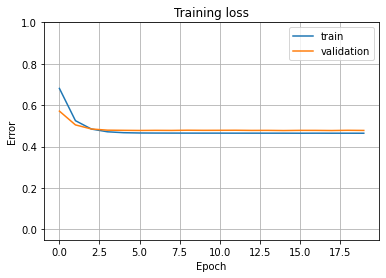

In [16]:
plot_loss(h_model_simple)
plt.ylim(-0.05, 1);

(0.5, 1.05)

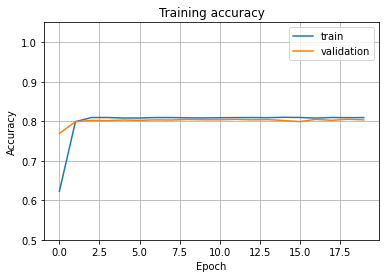

In [17]:
plot_accuracy(h_model_simple)
plt.ylim(0.5, 1.05)

In [18]:
Y_pred = model_simple.predict(X_test)

In [19]:
print(classification_report(Y_test, Y_pred.round(), target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.83      0.98      0.89      4703
           1       0.75      0.25      0.38      1297

    accuracy                           0.82      6000
   macro avg       0.79      0.61      0.64      6000
weighted avg       0.81      0.82      0.78      6000



In [20]:
cm = confusion_matrix(Y_test, Y_pred.round())
print("Confusion matrix:\n",cm)

Confusion matrix:
 [[4594  109]
 [ 972  325]]


## Complex model

In [21]:
model_complex = Sequential()
model_complex.add(layers.Dense(500, input_shape=(23, ), activation='relu'))
model_complex.add(layers.Dense(200, activation='relu'))
model_complex.add(layers.Dense(200, activation='relu'))
model_complex.add(layers.Dense(100, activation='relu'))
model_complex.add(layers.Dense(50, activation='relu'))
model_complex.add(layers.Dense(1, activation='sigmoid'))

model_complex.compile(loss=losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy())

model_complex.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               12000     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 177,601
Trainable params: 177,601
Non-trainable params: 0
________________________________________________

In [22]:
%%time
h_model_complex = model_complex.fit(X_train, Y_train,
                   epochs = 20,
                   batch_size=8,                 
                   verbose = 0,
                   validation_split = 0.2)

Wall time: 1min 33s


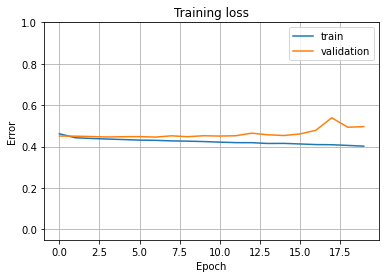

In [23]:
plot_loss(h_model_complex)
plt.ylim(-0.05, 1);

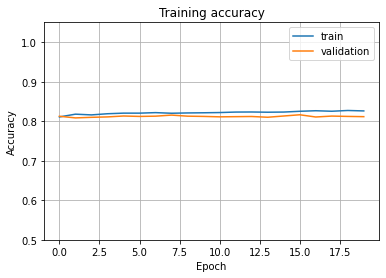

In [24]:
plot_accuracy(h_model_complex)
plt.ylim(0.5, 1.05);

In [25]:
Y_pred = model_complex.predict(X_test)

In [26]:
print(classification_report(Y_test, Y_pred.round(), target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      4703
           1       0.69      0.36      0.47      1297

    accuracy                           0.83      6000
   macro avg       0.77      0.66      0.68      6000
weighted avg       0.81      0.83      0.80      6000



In [27]:
cm = confusion_matrix(Y_test, Y_pred.round())
print("Confusion matrix:\n",cm)

Confusion matrix:
 [[4494  209]
 [ 832  465]]


## Evaluation

All the three models achieved almost the same accuracy with test set. The best accuracy was achieved with complex model, which was 0.01 better than simple model. All the models predicted better for value 0 than for value 1.

## Exercise 2: MNIST classification metrics (5p)

Create 1) a one-layer and b) a deep network model with dense layers to classify MNIST digits. You can use the examples notebook models as basis and modify them if you want to. Plot the training and validation accuracies for both models over training epochs. 

Compute suitable metrics for both models (see last slides of session03.pdf) and compare their performance. You can find their implementations in sklearn.metrics package.

Analyse both models with the confusion matrix. You can find confusion matrix implementation in sklearn.metrics package.

## a) One-layer model

In [28]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_val, y_val) = mnist.load_data()

x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_val = x_val.reshape(-1, 28 * 28).astype('float32') / 255.0

y_train_cat = keras.utils.to_categorical(y_train)
y_val_cat = keras.utils.to_categorical(y_val)

In [29]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Dense(10, input_shape=(28 * 28,), activation='softmax'))
model_a.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

model_a.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [30]:
hist_a = model_a.fit(x_train, y_train_cat, epochs=50, verbose=0, batch_size=64, validation_data=(x_val,y_val_cat))

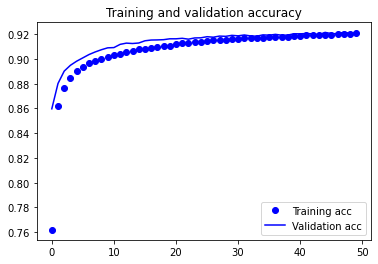

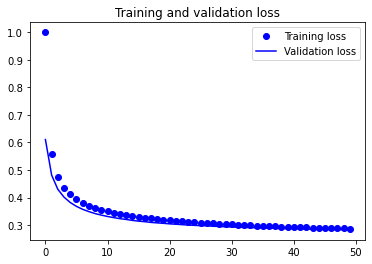

In [31]:
acc = hist_a.history['acc']
val_acc = hist_a.history['val_acc']
loss = hist_a.history['loss']
val_loss = hist_a.history['val_loss']

plt.plot(acc, 'bo', label='Training acc')
plt.plot(val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(loss, 'bo', label='Training loss')
plt.plot(val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [32]:
Y_pred = np.argmax(model_a.predict(x_val), axis=1)

In [33]:
print(classification_report(y_val, Y_pred, target_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.89      0.91      1032
           3       0.90      0.91      0.90      1010
           4       0.91      0.93      0.92       982
           5       0.91      0.86      0.88       892
           6       0.93      0.95      0.94       958
           7       0.93      0.92      0.92      1028
           8       0.87      0.89      0.88       974
           9       0.90      0.89      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [34]:
cm = confusion_matrix(y_val, Y_pred)
print("Confusion matrix:\n",cm)

Confusion matrix:
 [[ 960    0    3    1    0    4    9    1    2    0]
 [   0 1107    2    2    1    2    4    2   15    0]
 [   7    7  920   17   11    2   13   11   38    6]
 [   3    1   23  917    0   27    2   10   18    9]
 [   1    2    4    1  916    0   12    2    8   36]
 [  10    3    3   37   10  764   18    7   33    7]
 [  11    3    4    1   10   12  913    3    1    0]
 [   2   10   21    9    6    1    0  943    2   34]
 [   7    7    6   24    9   25   12   11  868    5]
 [  10    7    2   11   39    6    0   24    8  902]]


## b) Complex model

In [35]:
model_b = keras.models.Sequential()
model_b.add(keras.layers.Dense(600, input_shape=(28 * 28,), activation='relu'))
model_b.add(keras.layers.Dense(100, activation='relu'))
model_b.add(keras.layers.Dense(50, activation='relu'))
model_b.add(keras.layers.Dense(50, activation='relu'))
model_b.add(keras.layers.Dense(10, activation='softmax'))
model_b.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 600)               471000    
_________________________________________________________________
dense_9 (Dense)              (None, 100)               60100     
_________________________________________________________________
dense_10 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_11 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_12 (Dense)             (None, 10)                510       
Total params: 539,210
Trainable params: 539,210
Non-trainable params: 0
_________________________________________________________________


In [36]:
model_b.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

hist_b = model_b.fit(x_train, y_train_cat, epochs=20, batch_size=64, verbose=0, validation_data=(x_val,y_val_cat))

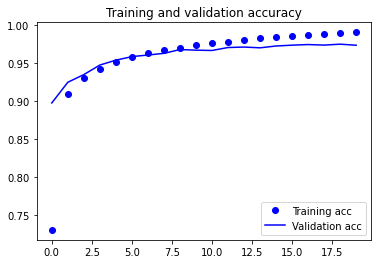

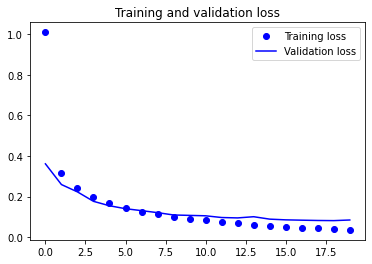

In [37]:
acc = hist_b.history['acc']
val_acc = hist_b.history['val_acc']
loss = hist_b.history['loss']
val_loss = hist_b.history['val_loss']

plt.plot(acc, 'bo', label='Training acc')
plt.plot(val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(loss, 'bo', label='Training loss')
plt.plot(val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [38]:
Y_pred = np.argmax(model_b.predict(x_val), axis=1)

In [39]:
print(classification_report(y_val, Y_pred, target_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.95      0.98      0.96      1010
           4       0.98      0.97      0.98       982
           5       0.99      0.94      0.96       892
           6       0.98      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.96      0.96      0.96       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [40]:
cm = confusion_matrix(y_val, Y_pred)
print("Confusion matrix:\n",cm)

Confusion matrix:
 [[ 968    0    0    1    0    0    5    2    3    1]
 [   0 1122    4    2    0    1    2    1    3    0]
 [   3    0 1016    2    1    0    0    4    5    1]
 [   0    0    7  991    0    1    0    4    6    1]
 [   1    0    6    0  957    0    4    3    0   11]
 [   4    0    1   26    2  839    6    2    9    3]
 [   5    3    1    1    5    6  933    0    4    0]
 [   0    5    9    1    0    0    0 1003    2    8]
 [   4    0    5   12    4    4    4    2  934    5]
 [   3    2    1    8    7    0    0    6    9  973]]


## Evaluation
Model b achieved better accuracy score as well as categorical crossentrophy value. From the confusion matrix we can see that less wrong predictions are done with model b for all categories.